TR_ID: C23, Product Name: Telephone, Total Revenue: 119700.00, Total Cost: 93660.00, Profit: 26040.00
---------------------------------------------------------------------------------------------------
Product TR_ID C23 brings profits ✅
 
TR_ID: C24, Product Name: Monitors, Total Revenue: 69178.05, Total Cost: 57585.60, Profit: 11592.45
---------------------------------------------------------------------------------------------------
Product TR_ID C24 brings profits ✅
 
TR_ID: C25, Product Name: Car, Total Revenue: 73136.70, Total Cost: 52182.00, Profit: 20954.70
---------------------------------------------------------------------------------------------------
Product TR_ID C25 brings profits ✅
 
TR_ID: C26, Product Name: Rent, Total Revenue: 58915.20, Total Cost: 28870.50, Profit: 30044.70
---------------------------------------------------------------------------------------------------
Product TR_ID C26 brings profits ✅
 
TR_ID: C27, Product Name: Services, Total Revenue: 21477.46

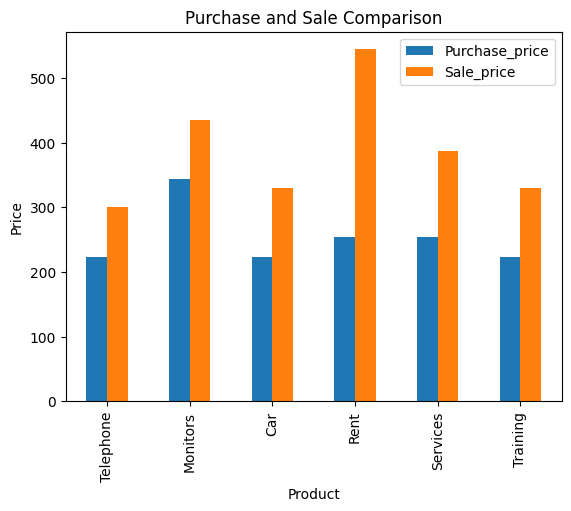

In [5]:
# Piotr Moleda

import pandas as pd 

import numpy as np 

import matplotlib.pyplot as plt 


database1 = {
    'TR_ID':['C23', 'C24', 'C25', 'C26', 'C27', 'C28'],
    'Product':['Telephone', 'Monitors', 'Car', 'Rent', 'Services', 'Training'],
    'Quantitys':[420, 'Ten', 234, 114, 56, 13],
    'Purchase_price':[223, 344, 223, 'Tenn', 'Two', 223]
}

database2 = {
    'TR_ID':['C23', 'C24', 'C25', 'C26', 'C27', 'C28'],
    'Product':['Telephone', 'Monitors', 'Car', 'Rent', 'Services', 'Training'],
    'Sale_price':[300, 435, 329, 544, 'thirty', 329],
    'Debit': [2, 2, 2, 2, 2, 2]
}

database3 = {
    'TR_ID': ['C28'],
    'Product': ['Training'],
    'Quantity': [13],
    'Purchase_price': [223],
    'Sale_price': [329]
}

df1 = pd.DataFrame(database1)
df2 = pd.DataFrame(database2)
df3 = pd.DataFrame(database3)

df1.columns = df1.columns.str.replace('s$', '', regex=True)
df2.columns = df2.columns.str.replace('s$', '', regex=True)

dbase4 = df1.merge(df2,how='left').merge(df3,how='left')

numeric_columns = ['Quantity', 'Purchase_price', 'Sale_price']
for column in numeric_columns:
  dbase4[column] = pd.to_numeric(dbase4[column], errors='coerce')

dbase4.fillna(dbase4.select_dtypes(include=np.number).mean(), inplace=True)

del dbase4['Debit']

department_map = {
    'Telephone' : 'IT',
    'Monitors' :  'IT',
    'Car' : 'Transport',
    'Rent' : 'Consultancy',
    'Services' : 'Consultancy',
    'Training' : 'Education'
}
dbase4['Department'] = dbase4['Product'].map(department_map)

ax = dbase4.plot(x='Product', y=['Purchase_price', 'Sale_price'], kind='bar')
ax.set_ylabel('Price')
ax.set_title('Purchase and Sale Comparison')
plt.show()

class Transaction:
  def __init__(self, TR_ID:str, Product:str, Quantity:int,
             Purchase_price:float,Sale_price:float):
    self.TR_ID = TR_ID
    self.Product = Product
    self.Quantity = Quantity
    self.Purchase_price = Purchase_price
    self.Sale_price = Sale_price

  def calculate_revenue(self):
    revenue = self.Quantity * self.Sale_price
    if revenue > 55000:
      revenue *= 0.95
    elif revenue > 35000 <= 55000:
      revenue *= 0.98
    else:
      revenue *= 0.99
    return revenue

  def calculate_cost(self):
    cost = self.Quantity * self.Purchase_price
    return cost

  def calculate_profit(self):
    revenue = self.calculate_revenue()
    cost = self.calculate_cost()
    profit = revenue - cost
    return profit

transactions =[]
for _, row in dbase4.iterrows():
    tr_id = row['TR_ID']
    product_name = row['Product']
    quantity = row['Quantity']
    purchase_price = row['Purchase_price']
    sale_price = row['Sale_price']

    transaction = Transaction (tr_id, product_name,
                            quantity,purchase_price,sale_price)  
    
    transactions.append(transaction)

for transaction in transactions:
  tr_id = transaction.TR_ID
  product_name = transaction.Product
  total_revenue = transaction.calculate_revenue()
  total_cost = transaction.calculate_cost()
  profit = transaction.calculate_profit()

  print('=====================================================================================================')
  print(f'TR_ID: {tr_id}, Product Name: {product_name}, '
        f'Total Revenue: {total_revenue:.2f}, Total Cost: {total_cost:.2f}, '
        f'Profit: {profit:.2f}')  
  if profit > 0:
    print('---------------------------------------------------------------------------------------------------')
    print(f'Product TR_ID {tr_id} brings profits \u2705')
    print(' ')
  elif profit == 0:
    print('---------------------------------------------------------------------------------------------------')
    print(f'Product TR_ID {tr_id} brings zero profit')
    print(' ')
  else:
    print('---------------------------------------------------------------------------------------------------')
    print(f'Product TR_ID {tr_id} is loss making \u274c')  
    print(' ')




